##### Dataset Creation

Classification Dataset

In [70]:
from sklearn.datasets import make_classification

In [71]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.

    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.

    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, drawn rand

In [72]:
data = make_classification(n_samples=500, n_features=4, n_classes=2, random_state=5)
data

(array([[ 0.39996881,  1.23558642,  1.77250799, -1.79416588],
        [ 0.49420313,  1.5532257 ,  2.31662486, -2.37783611],
        [ 0.51896258,  1.11933094, -0.00737454,  0.60758177],
        ...,
        [ 0.4408207 ,  0.91421395, -0.18067307,  0.73800074],
        [ 0.42943737,  1.16565229,  1.13553268, -0.94975959],
        [ 0.53543276,  1.37596892,  1.04675998, -0.71463303]]),
 array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1

In [73]:
x = data[0]
y = data[1]
x.shape, y.shape

((500, 4), (500,))

In [74]:
import matplotlib.pyplot as plt

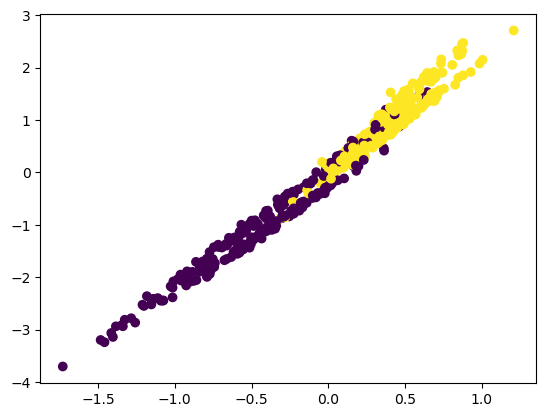

In [75]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 4), (125, 4), (375,), (125,))

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [79]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.936

In [80]:
import pandas as pd

In [81]:
df = pd.DataFrame(data=x, columns=['A', 'B', 'C', 'D'])
df['class'] = y
df

,A,B,C,D,class
0,0.399969,1.235586,1.772508,-1.794166,1
1,0.494203,1.553226,2.316625,-2.377836,1
2,0.518963,1.119331,-0.007375,0.607582,1
3,0.068901,0.060739,-0.419990,0.613784,1
4,0.110629,0.340800,0.485705,-0.490453,0
...,...,...,...,...,...
495,0.363110,0.416453,-1.753865,2.650034,0
496,0.594119,1.590704,1.466294,-1.180769,1
497,0.440821,0.914214,-0.180673,0.738001,1
498,0.429437,1.165652,1.135533,-0.949760,1


In [82]:
df.to_csv('datasets/random_dataset.csv')

In [85]:
from sklearn.datasets import make_regression

In [86]:
help(make_regression)

Help on function make_regression in module sklearn.datasets._samples_generator:

make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.

    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.

    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, default=100
        The number of samples.

    n_features : int, default=100
        The number of features.

    n_informative : int, default=10
        The number o

In [87]:
x, y = make_regression(n_samples=100, n_features=2, random_state=0)

In [89]:
x.shape, y.shape

((100, 2), (100,))

In [90]:
import numpy as np

In [93]:
np.corrcoef(x[:, 1], y)

array([[1.        , 0.95676698],
       [0.95676698, 1.        ]])

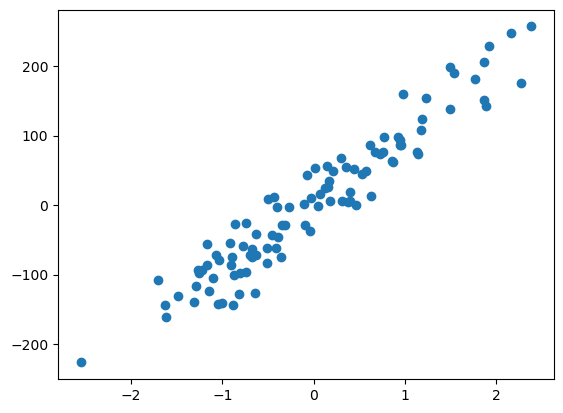

In [97]:
plt.scatter(x[:, 1], y)

In [98]:
import seaborn as sns

<Axes: >

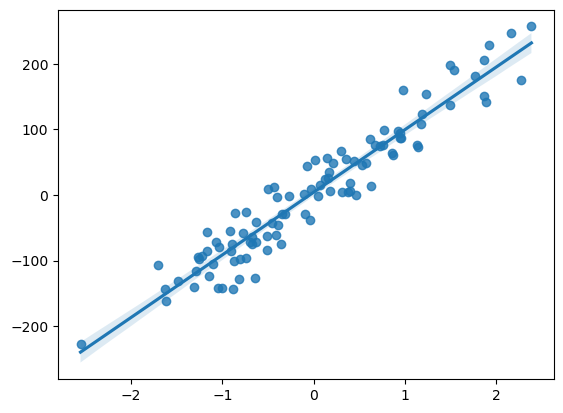

In [99]:
sns.regplot(x=x[:, 1], y=y)

In [103]:
from scipy.stats import linregress

In [104]:
linregress(x[:, 1], y)

LinregressResult(slope=95.49654703985269, intercept=4.170575884842424, rvalue=0.9567669790810881, pvalue=2.314155421975648e-54, stderr=2.932552526357482, intercept_stderr=2.9969465258783132)